### 数据格式转换
1. 差值
2. 计算角速度

需要注意
- 要把两个imu的时间段统一
- 选择合适的帧率

In [1]:
from scipy import interpolate
import math
import time

def get_data(path):
    with open(path) as f:
        data=eval(f.read())
    return data

def store(data,path):
    with open(path,'w') as f:
        f.write("%s\n"%str(time.time()))
        f.write("格式:[acc_x,acc_y,acc_z,pittch,yaw,row]\n")
        for item in data:
            f.write("%f\t%f\t%f\t%f\t%f\t%f\n"%(item[1],item[2],item[3],item[4],item[5],item[6]))

In [2]:
def yaw_pitch_row(data):
    '''
    原始格式:[time,yaw,pittch,row,acc_x,acc_y,acc_z]
    转换格式:[time,acc_x,acc_y,acc_z,pittch,yaw,row]
    '''
    table={0:0,1:4,2:5,3:6,4:2,5:1,6:3}
    res=[]
    for i in range(len(data)):
        res.append(data[table[i]])
    return res

def get_inter(data,begin,end,diff):
    tot=begin+1
    whole=[]
    nx=[]
    while tot<end-1:
        whole.append([tot])
        nx.append(tot)
        tot+=diff
        pass
    x=[]
    for item in data:
        x.append(item[0])

    for i in range(len(data[0][1])):
        #对于每个数据点
        cur=[]
        for j in range(len(data)):
            cur.append(data[j][1][i])
        f=interpolate.interp1d(x,cur,kind='linear')
        y=f(nx)
        for j in range(len(whole)):
            whole[j].append(y[j])

    #计算角速度,前三个数据点是角速度
    for i in range(len(whole)-1):
        for j in range(1,4):
            whole[i][j]=(whole[i+1][j]-whole[i][j])/diff
    del whole[-1]

    #根据串口数据调试，让yaw,pittch,roll与x,y,z轴对应
    res=[]
    for item in whole:
        res.append(yaw_pitch_row(item))

    return res

In [62]:
#看一下两个数据点之间的时间戳
imu1=eval(f1)
tot=0
interval=0
for i in range(1,len(imu1)):
    tot+=1
    interval+=imu1[i][0]-imu1[i-1][0]
    

In [3]:
def trans(path,diff=0.02):
    data=[]
    for item in path:
        data.append(get_data(item))
    begin=max(data[0][0][0],data[1][0][0])
    begin=math.floor(begin)
    end=min(data[0][-1][0],data[1][-1][0])
    end=math.ceil(end)
   
    for i in range(len(data)):
        cur=get_inter(data[i],begin,end,diff)
        curpath=path[i].replace('data','newdata',1)
        store(cur,curpath)


In [64]:
len(imu1)

1854

In [65]:
len(imu2)

2627

In [67]:
imu1[:10]

[(1625472245.924957, [71.9774, 18.1563, -15.7351, 0.5672, 0.0817, 0.006]),
 (1625472245.925916, [72.6049, 19.8604, -12.9963, 0.4697, 0.038, -0.1919]),
 (1625472245.9267688, [72.7159, 19.893, -10.6339, 0.2624, 0.0794, -0.3742]),
 (1625472245.927407, [72.5912, 19.2017, -9.1508, 0.1319, 0.0854, -0.4289]),
 (1625472245.928041, [72.3306, 18.3538, -8.8933, 0.0853, 0.0465, -0.3546]),
 (1625472245.928693, [72.1455, 17.4403, -9.7528, 0.0817, 0.0684, -0.2213]),
 (1625472245.929397, [72.0754, 16.4494, -11.2768, 0.0949, 0.1086, -0.0438]),
 (1625472245.930042, [71.8189, 15.4645, -13.1491, 0.0854, 0.1222, 0.0487]),
 (1625472245.930639, [71.0508, 14.7431, -15.3202, 0.0539, 0.0959, 0.0877]),
 (1625472245.931196, [70.0649, 14.1517, -17.4385, 0.0132, 0.0211, 0.1])]

In [68]:
from scipy import interpolate
import math

def get_data(path):
    with open(path) as f:
        data=eval(f.read())
    return data

def store(data,path):
    with open(path,'w') as f:
        f.write(str(data))

def get_inter(data,begin,end,diff):
    tot=begin
    whole=[]
    nx=[]
    while tot<end:
        whole.append([tot])
        nx.append(tot)
        tot+=diff
        pass
    x=[]
    for item in data:
        x.append(item[0])
    
    for i in range(len(data[0][1])):
        #对于每个数据点
        cur=[]
        for j in range(len(data)):
            cur.append(data[j][1][i])
        f=interpolate.interp1d(x,cur,kind='linear')
        y=f(nx)
        for j in range(len(whole)):
            whole[j].append(y[j])
    return whole


def trans(path,diff=0.1):
    diff=0.1
    data=[]
    for item in path:
        data.append(get_data(item))
    begin=max(data[0][0][0],data[1][0][0])
    begin=math.ceil(begin)
    end=min(data[0][-1][0],data[1][-1][0])
    end=math.floor(end)
   
    for i in range(len(data)):
        cur=get_inter(data[i],begin,end,diff)
        curpath=path[i].replace('data','newdata',1)
        store(cur,curpath)


In [24]:
diff = 0.1
data = []
path=['../data/imu1.txt','../data/imu2.txt']

for item in path:
    data.append(get_data(item))
begin = max(data[0][0][0], data[1][0][0])
print(begin)
begin = math.ceil(begin)
print(begin)
end = min(data[0][-1][0], data[1][-1][0])
print(end)
end = math.floor(end)
print(end)



1625630003.186948
1625630004
1625630023.15168
1625630023


In [9]:
tot=begin
whole=[]
nx=[]
diff=0.1
data=data[0]
while tot<end:
    whole.append([tot])
    nx.append(tot)
    tot+=diff
x=[]
for item in data:
    x.append(item[0])


In [10]:
for i in range(len(data[0][1])):
    cur=[]
    for j in range(len(data)):
        cur.append(data[j][1][i])
    f=interpolate.interp1d(x,cur,kind='linear')
    y=f(nx)
    for j in range(len(whole)):
        whole[j].append(y[j])


# 添加数据处理
1. 噪声平滑处理
2. 去除离群值

实现成单独的函数
方便对比差值、求导（计算角速度）、噪声离群点等算法的先后顺序

然后实现一下绘图，图片更加直观

## 去离群点算法
- MAD算法

找到偏差过大的点，然后去掉，然后把偏差较大点的index返回

In [1]:
import numpy as np
def MAD(dataset,n):
    median = np.median(dataset)
    deviations = abs(dataset - median)
    mad = np.median(deviations)
    remove_idx = np.where(abs(dataset - median) >  n * mad) 
    
    return list(remove_idx[0])

- 3σ算法

In [31]:
def three_sigma(dataset, n= 3):
    mean = np.mean(dataset)
    sigma = np.std(dataset)
 
    remove_idx = np.where(abs(dataset - mean) > n * sigma)
    return list(remove_idx[0])

In [15]:
a=[1,2,3,4,5,6,7,100]

In [16]:
def MAD(dataset,n):
    median = np.median(dataset)
    deviations = abs(dataset - median)
    mad = np.median(deviations)
    remove_idx = np.where(abs(dataset - median) >  n * mad)
    bigger=list(np.where(dataset-median>n*mad)[0])
    smaller=list(np.where(dataset+n*mad<median)[0])
    for item in bigger:
        dataset[item]=median+n*mad
    for item in smaller:
        dataset[item]=median-n*mad
    return dataset

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
tot=0

In [25]:
from scipy import interpolate
import math
import time
import numpy as np
tot=1

def MAD(dataset,n):
    median = np.median(dataset)
    deviations = abs(dataset - median)
    mad = np.median(deviations)
    remove_idx = np.where(abs(dataset - median) >  n * mad)
    cur=[]
    for item in list(remove_idx[0]):
        cur.append(dataset[item])
    print(cur)
    return list(remove_idx[0])

def three_sigma(dataset, n= 3):
    mean = np.mean(dataset)
    sigma = np.std(dataset)
    remove_idx = np.where(abs(dataset - mean) > n * sigma)
    cur=[]
    for item in list(remove_idx[0]):
        cur.append(dataset[item])
    print(cur)
    return list(remove_idx[0])

def get_data(path):
    with open(path) as f:
        data=eval(f.read())
    return data

def store(data,path):
    with open(path,'w') as f:
        f.write("%s\n"%str(time.time()))
        f.write("格式:[acc_x,acc_y,acc_z,pittch,yaw,row]\n")
        for item in data:
            f.write("%f\t%f\t%f\t%f\t%f\t%f\n"%(item[1],item[2],item[3],item[4],item[5],item[6]))


def yaw_pitch_row(data):
    '''
    原始格式:[time,yaw,pittch,row,acc_x,acc_y,acc_z]
    转换格式:[time,acc_x,acc_y,acc_z,pittch,yaw,row]
    '''
    table={0:0,1:4,2:5,3:6,4:2,5:1,6:3}
    res=[]
    for i in range(len(data)):
        res.append(data[table[i]])
    return res


def removeOutliers(remove_idx,data):
    res=[]
    for i in range(len(data)):
        if i not in remove_idx:
            res.append(data[i])
    return res

def get_inter(data,begin,end,diff):
    tot=begin
    whole=[]
    nx=[]
    while tot<end:
        whole.append([tot])
        nx.append(tot)
        tot+=diff
        pass
    x=[]
    for item in data:
        x.append(item[0])

    for i in range(len(data[0][1])):
        #对于每个数据点,做线性差值
        cur=[]
        for j in range(len(data)):
            cur.append(data[j][1][i])
        f=interpolate.interp1d(x,cur,kind='linear')
        y=f(nx)
        for j in range(len(whole)):
            whole[j].append(y[j])

    #计算角速度,前三个数据点是角速度
    #whole=derivative1(whole,[2,3,4],diff)
    for i in range(len(whole)-1):
        for j in range(1,4):
            whole[i][j]=(whole[i+1][j]-whole[i][j])/diff
    del whole[-1]

    #根据串口数据调试，让yaw,pittch,roll与x,y,z轴对应
    res=[]
    for item in whole:
        res.append(yaw_pitch_row(item))

    #去掉离群点
    #格式:[acc_x,acc_y,acc_z,pittch,yaw,row]
    convert=list(map(list,zip(*res)))
    remove_idx=[]
    for i in range(4,7):
        print(i)
        
        cur=MAD(convert[i],4)
        #cur=three_sigma(convert[i],2)
        print(cur)
        print('\n')
        remove_idx+=cur
    
    #绘图
    names=['g_x','g_y','g_z']
    colors=['r','g','b']
    x=list(range(len(convert[0])))
    
    for i in range(len(names)):
        plt.plot(x,convert[i+3],color=colors[i],label=names[i])
        for item in remove_idx:
            plt.scatter([item],[convert[i+3][item]],s=25,c='gray')

    res=removeOutliers(remove_idx,res)

    return res


def trans(path,diff=0.1):
    global tot
    data=[]
    for item in path:
        data.append(get_data(item))
    begin=max(data[0][0][0],data[1][0][0])
    begin=math.ceil(begin)
    end=min(data[0][-1][0],data[1][-1][0])
    end=math.floor(end)
   
    for i in range(len(data)):
        plt.subplot(1,2,tot)
        plt.title(path[i])
        plt.ylim((-300, 300))
        cur=get_inter(data[i],begin,end,diff)
        curpath=path[i].replace('data','newdata',1)
        store(cur,curpath)
        tot+=1

4
[-196.1272088737892, 53.61932724875608, 44.84151375078909, -42.96065873676042, -57.03336832637433, -58.33558049352561, -40.2611530918675, -39.9820422985529, -56.949056287318314, -49.390451277755574, -61.1723050900067, -56.11569000118507, 42.52806255638653, 43.14492806500752, -49.64374115146157]
[0, 2, 9, 20, 21, 22, 71, 118, 119, 120, 121, 122, 126, 131, 149]


5
[-261.42676246458774, -198.69204385616612, -195.26223712308393, -344.75615200504546, 272.10366163510895, 173.7730283040112, -142.03413583501046, -209.67213244941874, -178.5588331703238, -159.41769002372666, -236.45996744072306, -142.00560608089148, 148.81434467025485, 265.72194229702177, 157.72671818251297, 145.70815876924684, 155.35788757561207, -143.45390614707412, -135.65149193976993, -140.19393334618513, 144.57406926881447, 263.66408561715116, 160.44198142482855, -217.49576665077328, -216.61803669590228, -156.62866903317592, 142.40122270665552, 173.67611799745816, -252.0051385852635, -142.83970394595912]
[18, 19, 67, 68,

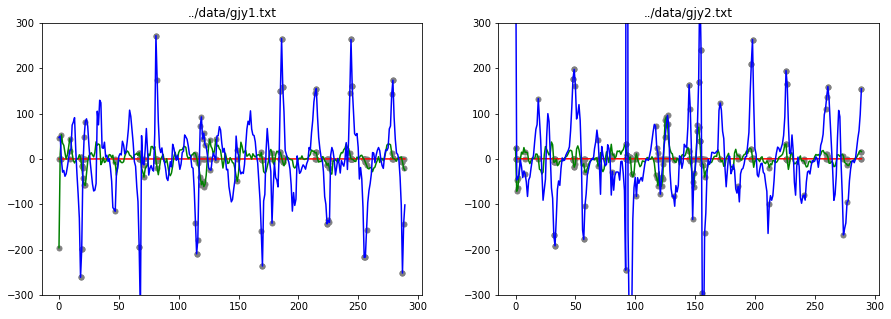

In [26]:
plt.figure(figsize=(15,5))
path=['../data/gjy1.txt','../data/gjy2.txt']
trans(path)

In [27]:
list(range(4,7))

[4, 5, 6]

In [1]:
f1=open('../data/1.csv')

In [2]:
f1=f1.read()

In [3]:
b=f1.split('\n')

In [4]:
b[0]

'设备名称\t电压\t版本\t片上时间\t加速度X(g)\t加速度Y(g)\t加速度Z(g)\t角速度X(°/s)\t角速度Y(°/s)\t角速度Z(°/s)\t角度X(°)\t角度Y(°)\t角度Z(°)\t磁场X\t磁场Y\t磁场Z\t四元数0\t四元数1\t四元数2\t四元数3\t状态'

In [5]:
b[1]

'WT901BLE57(EE6065091ED2)\t5.20\t13101\t 2021-07-09 15:32:39.512\t-0.078\t0.135\t1.009\t0.000\t0.183\t0.000\t7.592\t4.241\t58.909\t0.00\t0.00\t0.00\t0.00000\t0.00000\t0.00000\t0.00000'

In [6]:
a=[]

In [7]:
for item in b:
    cur=item.split('\t')
    a.append(cur)

In [8]:
a[0]

['设备名称',
 '电压',
 '版本',
 '片上时间',
 '加速度X(g)',
 '加速度Y(g)',
 '加速度Z(g)',
 '角速度X(°/s)',
 '角速度Y(°/s)',
 '角速度Z(°/s)',
 '角度X(°)',
 '角度Y(°)',
 '角度Z(°)',
 '磁场X',
 '磁场Y',
 '磁场Z',
 '四元数0',
 '四元数1',
 '四元数2',
 '四元数3',
 '状态']

In [9]:
a[1]

['WT901BLE57(EE6065091ED2)',
 '5.20',
 '13101',
 ' 2021-07-09 15:32:39.512',
 '-0.078',
 '0.135',
 '1.009',
 '0.000',
 '0.183',
 '0.000',
 '7.592',
 '4.241',
 '58.909',
 '0.00',
 '0.00',
 '0.00',
 '0.00000',
 '0.00000',
 '0.00000',
 '0.00000']

In [20]:
name=[]
for item in a:
    if item[0] not in name:
        name.append(item[0])

In [21]:
name

['设备名称',
 'WT901BLE57(EE6065091ED2)',
 'WT901BLE57(E9:5F:81:0E:B8:2F)',
 'WT901BLE57(FE:1F:CA:1B:6C:A9)',
 '']

In [18]:
a

[['设备名称',
  '电压',
  '版本',
  '片上时间',
  '加速度X(g)',
  '加速度Y(g)',
  '加速度Z(g)',
  '角速度X(°/s)',
  '角速度Y(°/s)',
  '角速度Z(°/s)',
  '角度X(°)',
  '角度Y(°)',
  '角度Z(°)',
  '磁场X',
  '磁场Y',
  '磁场Z',
  '四元数0',
  '四元数1',
  '四元数2',
  '四元数3',
  '状态'],
 ['WT901BLE57(EE6065091ED2)',
  '5.20',
  '13101',
  ' 2021-07-09 15:32:39.512',
  '-0.078',
  '0.135',
  '1.009',
  '0.000',
  '0.183',
  '0.000',
  '7.592',
  '4.241',
  '58.909',
  '0.00',
  '0.00',
  '0.00',
  '0.00000',
  '0.00000',
  '0.00000',
  '0.00000'],
 ['WT901BLE57(E9:5F:81:0E:B8:2F)',
  '5.29',
  '13101',
  ' 2021-07-09 15:32:39.526',
  '-0.497',
  '0.587',
  '0.627',
  '0.000',
  '0.000',
  '-0.122',
  '41.451',
  '30.740',
  '97.185',
  '0.00',
  '0.00',
  '0.00',
  '0.00000',
  '0.00000',
  '0.00000',
  '0.00000'],
 ['WT901BLE57(EE6065091ED2)',
  '5.20',
  '13101',
  ' 2021-07-09 15:32:39.535',
  '-0.076',
  '0.135',
  '1.010',
  '0.000',
  '-0.305',
  '0.061',
  '7.592',
  '4.235',
  '58.914',
  '0.00',
  '0.00',
  '0.00',
  '0.00000',
  '0

In [22]:
a=[1,2,3]

In [26]:
a.index(3)

2

In [27]:
for i in range(4,7):
    print(i)

4
5
6


In [93]:
a=' 2021-07-09 15:32:50.714910'

In [104]:
a=' 2021-07-09 15:32:50'
b=a.strip()

In [105]:
import time
ta=time.strptime(b,"%Y-%m-%d %H:%M:%S")

In [98]:
time.mktime(ta)

1625815970.0

In [99]:
ta

time.struct_time(tm_year=2021, tm_mon=7, tm_mday=9, tm_hour=15, tm_min=32, tm_sec=50, tm_wday=4, tm_yday=190, tm_isdst=-1)

In [106]:
ta

time.struct_time(tm_year=2021, tm_mon=7, tm_mday=9, tm_hour=15, tm_min=32, tm_sec=50, tm_wday=4, tm_yday=190, tm_isdst=-1)

In [56]:
b=time.localtime(a)

In [60]:
otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S", b)

In [61]:
otherStyleTime

'2021-07-13 18:01:08'

In [63]:
# time获取当前时间戳
now = int(time.time())     # 1533952277
timeArray = time.localtime(now)
print(timeArray)
otherStyleTime = time.strftime("%Y--%m--%d %H:%M:%S", timeArray)
print(otherStyleTime)

# # 结果如下
# time.struct_time(tm_year=2018, tm_mon=8, tm_mday=11, tm_hour=9, tm_min=51, tm_sec=17, tm_wday=5, tm_yday=223, tm_isdst=0)


# # datetime获取当前时间，数组格式
# now = datetime.datetime.now()
# print(now)
# otherStyleTime = now.strftime("%Y--%m--%d %H:%M:%S")
# print(otherStyleTime)


time.struct_time(tm_year=2021, tm_mon=7, tm_mday=13, tm_hour=18, tm_min=3, tm_sec=50, tm_wday=1, tm_yday=194, tm_isdst=0)
2021--07--13 18:03:50


In [64]:
a

1626170468.9167528

In [92]:
ta=time.strptime(time.time(),"%Y-%m-%d %H:%M:%S.%f")

TypeError: strptime() argument 0 must be str, not <class 'float'>

In [107]:
import time
import datetime
#  首先将时间字符串处理成标准的，即将小数位去掉
time_stamp = "2019-04-10 00:30:10.198" .split('.')[0]

#  将字符串转化为时间戳
h =  time.mktime(time.strptime(time_stamp, "%Y-%m-%d %H:%M:%S"))

#  将时间戳转换为字符串
start_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(h-30))
end_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(h+30))

#  将时间字符串转化为datetime类型
start_date = datetime.datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S")

#  将时间戳转化为datetime类型
t = datetime.datetime.fromtimestamp(h)
print(t,type(t))


print(start_date,type(start_date))

2019-04-10 00:30:10 <class 'datetime.datetime'>
2019-04-10 00:29:40 <class 'datetime.datetime'>


In [108]:
now = int(time.time())

In [109]:
timeArray = time.localtime(now)

In [110]:
now

1626172516

In [113]:
print(timeArray)

time.struct_time(tm_year=2021, tm_mon=7, tm_mday=13, tm_hour=18, tm_min=35, tm_sec=16, tm_wday=1, tm_yday=194, tm_isdst=0)


In [112]:
otherStyleTime = time.strftime("%Y--%m--%d %H:%M:%S", timeArray)

In [114]:
print(otherStyleTime)

2021--07--13 18:35:16


In [115]:
now = datetime.datetime.now()

In [116]:
now

datetime.datetime(2021, 7, 13, 18, 36, 32, 179848)

In [117]:
print(now)

2021-07-13 18:36:32.179848


In [118]:
otherStyleTime = now.strftime("%Y--%m--%d %H:%M:%S.%f")

In [119]:
print(otherStyleTime)

2021--07--13 18:36:32.179848


In [120]:
otherStyleTime

'2021--07--13 18:36:32.179848'

In [121]:
import datetime

In [122]:
t1='2017-04-03 10:42:50.714910'

In [123]:
d = datetime.datetime.strptime(t1, '%Y-%m-%d %H:%M:%S.%f')

In [124]:
d

datetime.datetime(2017, 4, 3, 10, 42, 50, 714910)

In [131]:
d2 = datetime.datetime.strptime('2017-04-03 9:41:20', '%Y-%m-%d %H:%M:%S')

In [132]:
d2

datetime.datetime(2017, 4, 3, 9, 41, 20)

In [139]:
(d-d2).microseconds

714910

In [137]:
d-d2

datetime.timedelta(seconds=3690, microseconds=714910)

In [140]:
max(1,2,3)

3

In [141]:
a=[1,2,3]

In [142]:
max(a)

3

In [143]:
d

datetime.datetime(2017, 4, 3, 10, 42, 50, 714910)

In [144]:
datetime_stamp = datetime.timestamp(d)

AttributeError: module 'datetime' has no attribute 'timestamp'

In [145]:
datetime.timestamp

AttributeError: module 'datetime' has no attribute 'timestamp'

In [147]:
d.timestamp()

1491187370.71491

In [148]:
type(d.timestamp())

float

In [149]:
b=list(range(10))

In [150]:
b

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [1]:
f1=open('../data/90_11.txt')

In [2]:
f1=f1.read()

In [3]:
f1=eval(f1)

In [4]:
len(f1)

3088

In [5]:
f2=open('../data/90_12.txt')

In [6]:
f2=f2.read()
f2=eval(f2)

In [7]:
len(f2)

3092

In [8]:
a=[1,2,3,4,5]

In [9]:
b=3

In [10]:
a[:3]

[1, 2, 3]

In [1]:
import numpy as np

In [9]:
a=np.zeros((4,1))

In [11]:
a

array([[0.],
       [0.],
       [0.],
       [0.]])

In [8]:
a.dtype

dtype('float64')

In [12]:
import math

In [15]:
math.cos(3.14)

-0.9999987317275395

In [22]:
def s(tt):
    print(math.sin(tt*math.pi/180))

In [24]:
s(90)

1.0


In [25]:
for j in range(3,6):
    print(j)

3
4
5


In [35]:
a=np.zeros((4,1))

In [37]:
a=np.array([[1.],[2.],[3.],[4.]])

In [38]:
a

array([[1.],
       [2.],
       [3.],
       [4.]])

In [41]:
a.shape[0]

4

In [42]:
a

array([[1.],
       [2.],
       [3.],
       [4.]])

In [43]:
a[1][0]

2.0

In [44]:
a[2][0]

3.0

In [102]:
lst = [[1,2,3,4,5,6], [7,8,9,10,11,12], [71,81,91,101,111,121]]
arr = np.asarray(lst)
 
print(arr[0:2, 0:4])

[[ 1  2  3  4]
 [ 7  8  9 10]]


In [94]:
arr

array([[  1,   2,   3,   4,   5,   6],
       [  7,   8,   9,  10,  11,  12],
       [ 71,  81,  91, 101, 111, 121]])

In [47]:
np.zeros((2,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [73]:
arr[0:2, 1]

array([2, 8])

In [53]:
import math
math.pow(3,2)

9.0

In [57]:
a=[1,2,\
  3]

In [58]:
a

[1, 2, 3]

In [69]:
arr.transpose()

array([[  1,   7,  71],
       [  2,   8,  81],
       [  3,   9,  91],
       [  4,  10, 101],
       [  5,  11, 111],
       [  6,  12, 121]])

In [103]:
arr

array([[  1,   2,   3,   4,   5,   6],
       [  7,   8,   9,  10,  11,  12],
       [ 71,  81,  91, 101, 111, 121]])

In [104]:
arr

array([[  1,   2,   3,   4,   5,   6],
       [  7,   8,   9,  10,  11,  12],
       [ 71,  81,  91, 101, 111, 121]])

In [105]:
arr[0:4,1]

array([ 2,  8, 81])

In [106]:
arr[0:4,1:2]

array([[ 2],
       [ 8],
       [81]])

In [90]:
b

1

In [79]:
abs(2-3)

1

In [81]:
print(arr)

[[  1   2   3   4   5   6]
 [  7   8   9  10  11  12]
 [ 71  81  91 101 111 121]]


In [82]:
a=np.array([1,2,3])

In [83]:
a

array([1, 2, 3])

In [84]:
a=np.array([1,2,3])

In [85]:
vj1=np.zeros((3,1))

In [86]:
vj1

array([[0.],
       [0.],
       [0.]])

In [87]:
vj1=np.array([[1.],[2.],[3.]])

In [88]:
vj1

array([[1.],
       [2.],
       [3.]])

In [107]:
import numpy as np

a  = np.array([[1, 2], [3, 4]])  # 初始化一个非奇异矩阵(数组)
print(np.linalg.inv(a))  # 对应于MATLAB中 inv() 函数

[[-2.   1. ]
 [ 1.5 -0.5]]


In [108]:
print(np.linalg.pinv(a))   # 求矩阵 A 的伪逆（广义逆矩阵），对应于MATLAB中 pinv() 函数

[[-2.   1. ]
 [ 1.5 -0.5]]


In [109]:
def pow(tt):
    return math.pow(tt,2)

In [150]:
import seaborn as sns
import numpy as np
from numpy.random import randn
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 

In [151]:
sns.set_palette('deep', desat=.6)
sns.set_context(rc={'figure.figsize': (8, 5) } )

In [182]:
def data_n(i):
    f=open('../result/%d_3.txt'%i)
    f=f.read()
    f=eval(f)
    result=[]
    for item in f:
        result.append(item['angle_gyr']*10)
    return result[:1000]

In [183]:
name=['0','45','90','135','180']
c={}
for i in range(len(name)):
    an=i*45
    c[name[i]]=data_n(an)

In [184]:
c['45']

[0.06147880351809812,
 0.07564567276661263,
 0.06942818916878453,
 0.06536282487836334,
 0.06265484890272617,
 0.06155059546790764,
 0.06179201447035574,
 0.0621534917351952,
 0.06238431749767498,
 0.06236764276158646,
 0.0650284949330647,
 0.07557244874832295,
 0.08959705506371608,
 0.112007678945711,
 0.14509612624772142,
 0.186287321643912,
 0.23531826477609852,
 0.2962728467387072,
 0.36487791075627607,
 0.44189803420785634,
 0.5260872954927881,
 0.6124820832238103,
 0.7011427707641831,
 0.7915975740453711,
 0.8790065537583734,
 0.9670926846005046,
 1.0547371900303597,
 1.1424502538512238,
 1.2316617149874303,
 1.324202866862168,
 1.4213942112967723,
 1.5200612016844381,
 1.6175501725380539,
 1.7111982828535688,
 1.801597855364534,
 1.8873104499604128,
 1.9719446576731134,
 2.054100110441513,
 2.128864921655143,
 2.1975689304240245,
 2.259114089357797,
 2.3129371359551345,
 2.3594346934730583,
 2.3999370206630215,
 2.437209685906492,
 2.4738408348951717,
 2.5100783391376162,
 2.544

In [185]:
from pandas.core.frame import DataFrame
ndata=DataFrame(c)

<AxesSubplot:>

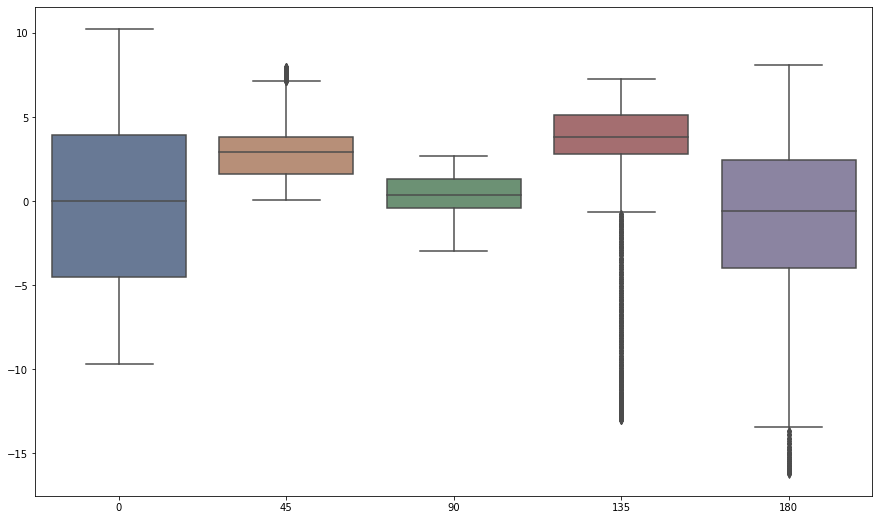

In [186]:
plt.figure(figsize=(15,9))
sns.boxplot(data=ndata)

In [4]:
a=0.0
if a==0:
    print(1)

1


In [11]:
import os
b=os.listdir('../data/')

In [12]:
b

['180_11.txt',
 '.DS_Store',
 '180_12.txt',
 '90_11.txt',
 '0_31.txt',
 '135_22.txt',
 '90_12.txt',
 '0_32.txt',
 '135_21.txt',
 '45_11.txt',
 '135_31.txt',
 '0_22.txt',
 '45_12.txt',
 '135_32.txt',
 '0_21.txt',
 '45_22.txt',
 '0_11.txt',
 '90_31.txt',
 '45_21.txt',
 '0_12.txt',
 '90_32.txt',
 '90_22.txt',
 '135_11.txt',
 '45_31.txt',
 '90_21.txt',
 '135_12.txt',
 '45_32.txt',
 '180_22.txt',
 '180_21.txt',
 '180_31.txt',
 '180_32.txt']

In [7]:
b.remove('.DS_Store')

In [8]:
b

['180_11.txt',
 '180_12.txt',
 '90_11.txt',
 '0_31.txt',
 '135_22.txt',
 '90_12.txt',
 '0_32.txt',
 '135_21.txt',
 '45_11.txt',
 '135_31.txt',
 '0_22.txt',
 '45_12.txt',
 '135_32.txt',
 '0_21.txt',
 '45_22.txt',
 '0_11.txt',
 '90_31.txt',
 '45_21.txt',
 '0_12.txt',
 '90_32.txt',
 '90_22.txt',
 '135_11.txt',
 '45_31.txt',
 '90_21.txt',
 '135_12.txt',
 '45_32.txt',
 '180_22.txt',
 '180_21.txt',
 '180_31.txt',
 '180_32.txt']

In [9]:
b.remove('.DS_Store')

ValueError: list.remove(x): x not in list

In [10]:
if '.DS_Store' in b:
    b.remove('.DS_Store')

In [13]:
a='  asd\n\n'

In [14]:
a

'  asd\n\n'

In [15]:
a.strip()

'asd'

In [16]:
a

'  asd\n\n'